In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [ ]:
print(f"Shape of dataset \n * Rows : {df.shape[0]} \n * columns : {df.shape[1]}")

Shape of dataset 
 * Rows : 2838 
 * columns : 116


In [ ]:
print("Columns in dataset \n\n",df.columns)

Columns in dataset 

 Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)


In [ ]:
print("Total Duplicate Value in dataset: ",df.duplicated().sum())

Total Duplicate Value in dataset:  0


In [ ]:
print("Total Null Values in Dataset :",df.isnull().sum().sum())

Total Null Values in Dataset : 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [ ]:
df.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [ ]:
df["subreddit"].unique()   #Post-Traumatic Stress Disorder - ptsd

array(['ptsd', 'assistance', 'relationships', 'survivorsofabuse',
       'domesticviolence', 'anxiety', 'homeless', 'stress',
       'almosthomeless', 'food_pantry'], dtype=object)

In [ ]:
df["subreddit"].value_counts()

,count
subreddit,
ptsd,584
relationships,552
anxiety,503
domesticviolence,316
assistance,289
survivorsofabuse,245
homeless,168
almosthomeless,80
stress,64


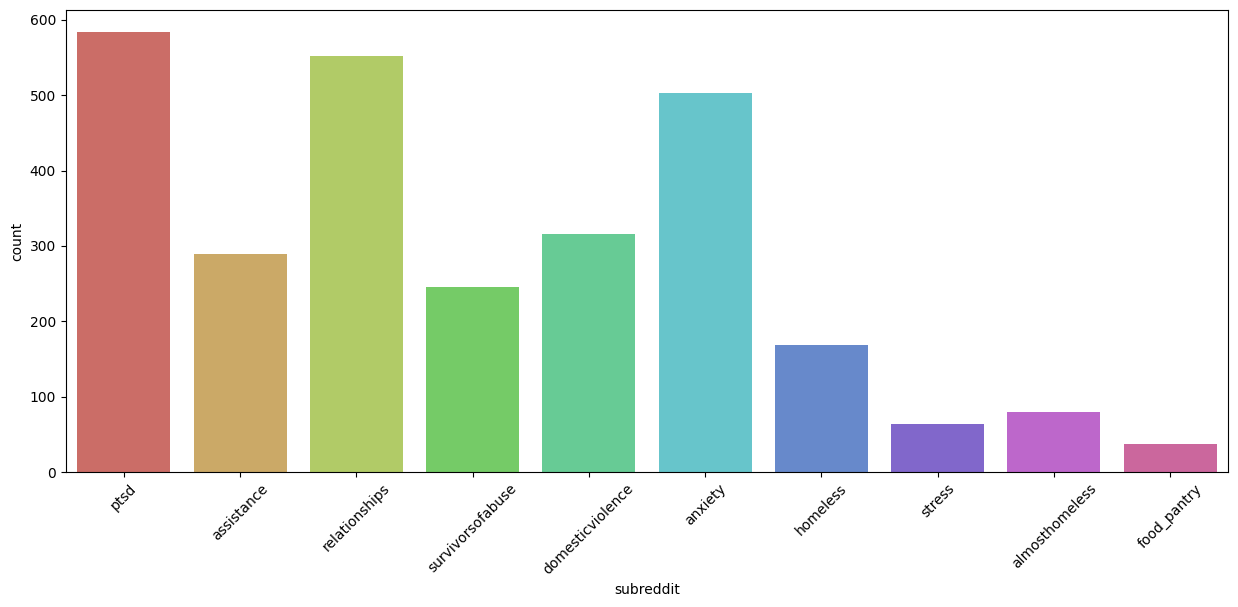

In [ ]:
plt.figure(figsize = (15,6))
sns.countplot(x = "subreddit", data = df, palette = "hls")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
df["label"].unique()

array([1, 0])

In [ ]:
df["label"].value_counts()

,count
label,
1,1488
0,1350


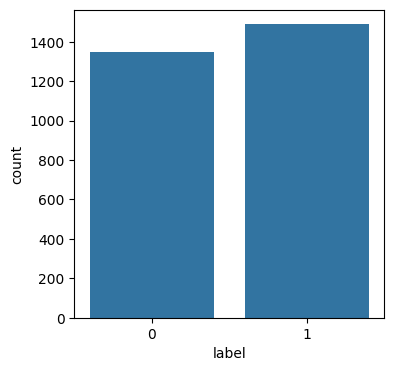

In [ ]:
plt.figure(figsize = (4,4))
sns.countplot(x = "label", data = df)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
import re
from string import punctuation
from nltk import SnowballStemmer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
!pip install nltk
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_word = set(stopwords.words("english"))
stemm = SnowballStemmer("english")

In [ ]:
def text_clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stop_word]
    text=" ".join(text)
    text = [stemm.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
df["text"] = df["text"].apply(text_clean)

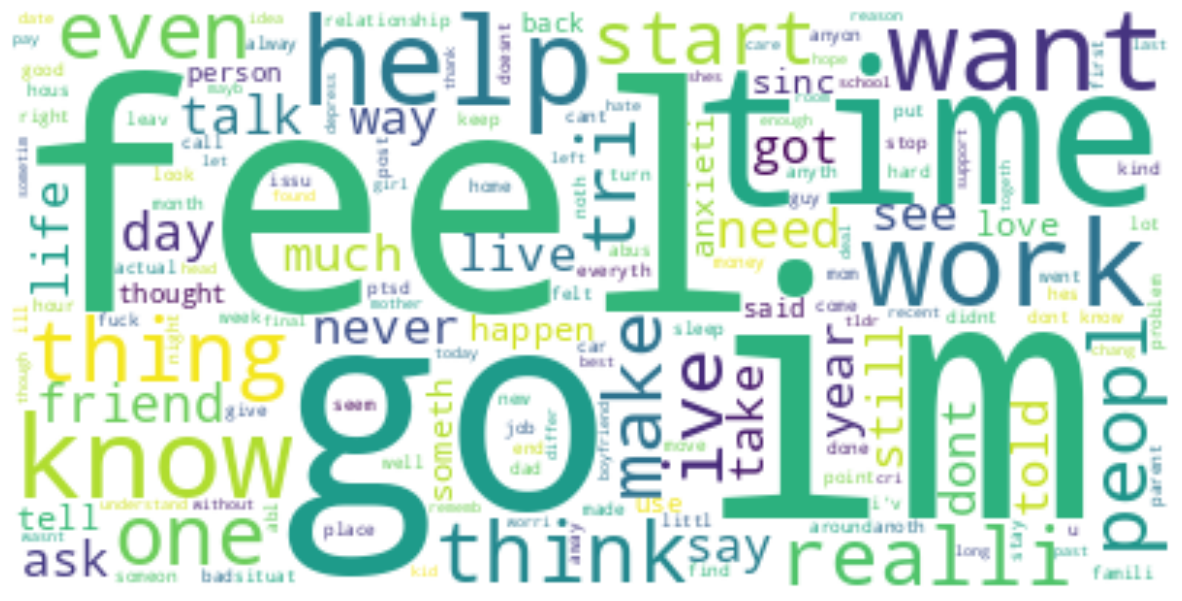

In [ ]:
# Most frequent word in text columns
text = " ".join(i for i in df.text)
wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df["label"] = df["label"].map({0:"No Stress", 1:"Stress"})


In [ ]:
final_df = df[["text","label"]]
print(final_df.head())

                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [ ]:
# Model Building
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
# first split data into x and y
x = np.array(final_df["text"])
y = np.array(final_df["label"])

In [ ]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [ ]:
# split into train and test # XGBoost + SVM

X_train,X_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=2023)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
# Score of model
lr_train = {lr.score(X_train,y_train)*100}
lr_test = {lr.score(X_test,y_test)*100}
print(f"score of X_train and y_train : {lr_train}")
print(f"score of X_test and y_test : {lr_test}")

score of X_train and y_train : {99.49647532729104}
score of X_test and y_test : {73.82629107981221}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Score of model
rf_train = {rf.score(X_train,y_train)*100}
rf_text = {rf.score(X_test,y_test)*100}
print(f"score of X_train and y_train : {rf_train}")
print(f"score of X_test and y_test : {rf_text}")

score of X_train and y_train : {99.9496475327291}
score of X_test and y_test : {71.71361502347418}


In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)
xgb_train = {xgb.score(X_train, y_train_encoded) * 100}
xgb_test = {xgb.score(X_test, y_test_encoded) * 100}
# Score of model
print(f"Score of X_train and y_train : {xgb_train}")
print(f"Score of X_test and y_test : {xgb_test}")

Score of X_train and y_train : {98.18731117824774}
Score of X_test and y_test : {71.71361502347418}


In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)
# Score of model
bnb_train = {bnb.score(X_train,y_train)*100}
bnb_test = {bnb.score(X_test,y_test)*100}
print(f"score of X_train and y_train : {bnb_train}")
print(f"score of X_test and y_test : {bnb_test}")

score of X_train and y_train : {91.23867069486404}
score of X_test and y_test : {72.06572769953051}


In [ ]:
from sklearn.svm import SVC

# Create an SVC (Support Vector Classifier) model
svm = SVC(probability=True)

# Train the SVM model
svm.fit(X_train, y_train)

# Score of the model on training data
svm_train_score = svm.score(X_train, y_train) * 100

# Score of the model on testing data
svm_test_score = svm.score(X_test, y_test) * 100

print(f"Score of SVM on training data: {svm_train_score}%")
print(f"Score of SVM on testing data: {svm_test_score}%")

Score of SVM on training data: 96.67673716012085%
Score of SVM on testing data: 72.76995305164318%


In [ ]:
from sklearn.metrics import accuracy_score #Hybrid model for XGBoost and Logistic Regression

svm_train_preds = svm.predict_proba(X_train)
svm_test_preds = svm.predict_proba(X_test)

xgb_train_preds = xgb.predict_proba(X_train)
xgb_test_preds = xgb.predict_proba(X_test)

# Combine predictions
train_preds = (0.5 * xgb_train_preds) + (0.5 * svm_train_preds)
test_preds = (0.5 * xgb_test_preds) + (0.5 * svm_test_preds)

train_pred_labels = np.argmax(train_preds, axis=1)
test_pred_labels = np.argmax(test_preds, axis=1)

train_accuracy = accuracy_score(y_train_encoded, train_pred_labels)
test_accuracy = accuracy_score(y_test_encoded, test_pred_labels)

print(f"Hybrid Model Accuracy on Training Set: {train_accuracy * 100:.2f}%")
print(f"Hybrid Model Accuracy on Test Set: {test_accuracy * 100:.2f}%")


Hybrid Model Accuracy on Training Set: 98.04%
Hybrid Model Accuracy on Test Set: 73.12%


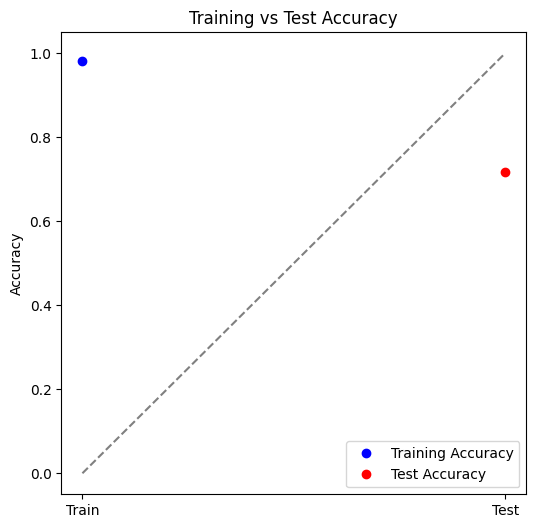

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your XGBoost model and obtained training and test accuracies
train_accuracy = xgb.score(X_train, y_train_encoded)
test_accuracy = xgb.score(X_test, y_test_encoded)

# Plotting
plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for reference
plt.plot(0, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(1, test_accuracy, 'ro', label='Test Accuracy')
plt.xticks([0, 1], ['Train', 'Test'])
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Assume 'cv' is your CountVectorizer object used during training
user_input = input("Enter Text: ")

# Transform input data using CountVectorizer or any other preprocessing steps you used
data = cv.transform([user_input])

# Generate predictions using both XGBoost and SVM
svm_preds = svm.predict_proba(data)
xgb_preds = xgb.predict_proba(data)

# Combine predictions
combined_preds = (0.5 * xgb_preds) + (0.5 * svm_preds)

# Get the predicted class label
predicted_class_index = np.argmax(combined_preds)
# Reshape to 1D array
predicted_class_index = np.array([predicted_class_index])
predicted_class = label_encoder.inverse_transform(predicted_class_index)

print("Predicted class:", predicted_class[0])


Enter Text: I am so frustrated.
Predicted class: No Stress


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv("/content/drive/MyDrive/stress.csv")

# Preprocessing
def text_clean(text):
    # Implement your text cleaning function here
    # For example, let's say we simply want to convert text to lowercase
    cleaned_text = text.lower()
    return cleaned_text

df["text"] = df["text"].apply(text_clean)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.3, random_state=2023)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5)
svm_grid.fit(X_train_tfidf, y_train)

# Hyperparameter tuning for XGBoost
param_grid_xgb = {'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 7], 'n_estimators': [100, 200, 300]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=5)
xgb_grid.fit(X_train_tfidf, y_train)

# Define base models
base_models = [
    ('svm', svm_grid.best_estimator_),
    ('xgb', xgb_grid.best_estimator_)
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train stacking classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Predictions
y_pred_train = stacking_clf.predict(X_train_tfidf)
y_pred_test = stacking_clf.predict(X_test_tfidf)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Hybrid Model Accuracy on Training Set: {train_accuracy * 100:.2f}%")
print(f"Hybrid Model Accuracy on Test Set: {test_accuracy * 100:.2f}%")


KeyboardInterrupt: 

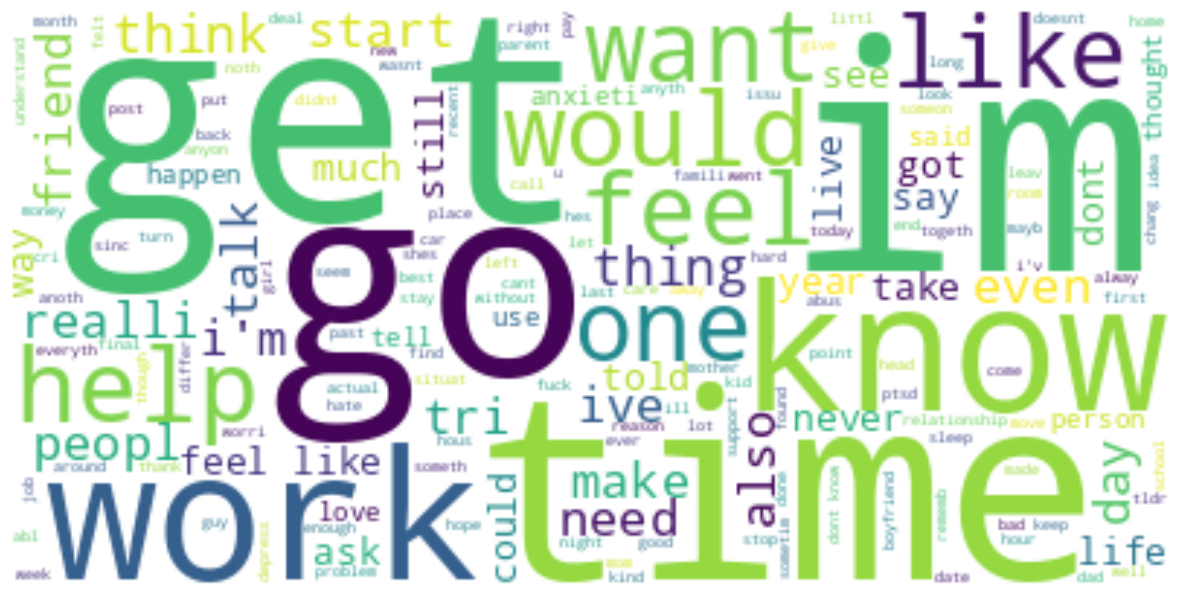

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['No Stress' 'Stress']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

# Suppressing warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/stress.csv")

# Function to clean text data
def text_clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')])
    return text

# Clean the text data
stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")
df["clean_text"] = df["text"].apply(text_clean)

# Word Cloud
text = " ".join(word for word in df.clean_text)
wordcloud = WordCloud(stopwords=set(stop_words), background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Model Building
cv = CountVectorizer()
X = cv.fit_transform(df["clean_text"])
y = df["label"].map({0: "No Stress", 1: "Stress"})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

# Hyperparameter tuning for SVM
svm_params = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5)
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

# Hyperparameter tuning for XGBoost
xgb_params = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 200, 300]}
xgb_grid = GridSearchCV(XGBClassifier(), xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Ensemble with optimized models
svm_train_preds = best_svm.predict_proba(X_train)
svm_test_preds = best_svm.predict_proba(X_test)

xgb_train_preds = best_xgb.predict_proba(X_train)
xgb_test_preds = best_xgb.predict_proba(X_test)

# Combine predictions
train_preds = (0.5 * xgb_train_preds) + (0.5 * svm_train_preds)
test_preds = (0.5 * xgb_test_preds) + (0.5 * svm_test_preds)

train_pred_labels = np.argmax(train_preds, axis=1)
test_pred_labels = np.argmax(test_preds, axis=1)

train_accuracy = accuracy_score(y_train, train_pred_labels)
test_accuracy = accuracy_score(y_test, test_pred_labels)

print(f"Hybrid Model Accuracy on Training Set: {train_accuracy * 100:.2f}%")
print(f"Hybrid Model Accuracy on Test Set: {test_accuracy * 100:.2f}%")
